# Ensemble Model Assignment: Norberto Rancharan


### For this assignment use data at: “https://www.kaggle.com/wendykan/lending-club-loan-data/download”

1. Read the data and do the preprocessing similar to the GBM file submitted to eLearning. Try not to exclude any variable as much as possible.

2. Split the sample to test and train.

3. Use sklearn to build a GBM model to predict whether a customer has any delinquent account. Do Grid search on as many parameters as you find useful. Include “Number of Trees”, and “Learning Rate” for sure. Use the train sample.

4. For each model, store the AUC on the test and train. At the end, choose the best model that gives you the best bias-variance.

5. Draw a histogram for predicted probabilities in each class. Something like the following graph, where for example orange is class 0 and blue is class 1. How should the ideal graph look like?
###

# Importing Necessary Libraries

In [70]:
# Import packages
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.externals import joblib

# Converting CSV File to Pickle for Faster Reading In

In [2]:
# Converting the large csv file into a pickle file for faster reading (12.31s vs. 50.73s)

#loan_dat = pd.read_csv("loan.csv")
#with open("loan.pickle","wb") as f:
#    pickle.dump(loan_dat,f)

In [3]:
with open("loan.pickle", "rb") as f:
    loan_dat = pickle.load(f)

# Data Cleaning / Preprocessing

In [4]:
#Finding out how many rows and columns are in the 
# 2,260,668 Rows
# 145 Columns
loan_dat.shape

(2260668, 145)

In [5]:
data_types = loan_dat.dtypes
data_types = pd.DataFrame(data_types, columns=['Data Types'])
data_types.sort_index(ascending=True, inplace=True)
data_types.head()

,Data Types
acc_now_delinq,float64
acc_open_past_24mths,float64
addr_state,object
all_util,float64
annual_inc,float64


In [6]:
# There are 36 Columns with String Types
# and 109 Columns of Numerical Types

data_types.groupby('Data Types').size()

Data Types
int64        4
float64    105
object      36
dtype: int64

In [7]:
loan_dat.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [8]:
loan_dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [9]:
type(loan_dat.describe())

pandas.core.frame.DataFrame

# Removing Irrelevant Columns

In [10]:
# Dropping Columns that have redundant information, have no use, or information that won't be accessible for new customers

temp_data = loan_dat.drop(columns=['collection_recovery_fee','desc','disbursement_method'
                                  ,'emp_title','funded_amnt','funded_amnt_inv','home_ownership'
                                  ,'id','int_rate','issue_d','last_pymnt_amnt','last_pymnt_d'
                                  ,'member_id','out_prncp','out_prncp_inv','purpose','recoveries'
                                  ,'sub_grade','title','total_pymnt','total_pymnt_inv','total_rec_int'
                                  ,'total_rec_late_fee','total_rec_prncp','url','verification_status'
                                  ,'verification_status_joint','zip_code','earliest_cr_line'
                                  ,'last_credit_pull_d','next_pymnt_d','hardship_start_date'
                                  ,'hardship_end_date','payment_plan_start_date'
                                  ,'debt_settlement_flag_date','settlement_date'
                                  ,'sec_app_earliest_cr_line'], axis = 1)

# Analysis for Imputation

In [11]:
data_types = temp_data.dtypes
temp_null = pd.DataFrame(temp_data.isnull().sum(),columns=['AmountNull'])
temp_null['Data Types'] = data_types
temp_null['%Missing'] = 0

In [12]:
for i in range(len(temp_null.iloc[:,0])):
    temp_null.iloc[i,2] = (temp_null.iloc[i,0] / temp_data.shape[0])*100

In [13]:
# There are 102 Columns that have Null Values

temp_null = temp_null[temp_null['%Missing'] > 0]
temp_null.head()

,AmountNull,Data Types,%Missing
emp_length,146907,object,6.498389
annual_inc,4,float64,0.000177
dti,1711,float64,0.075686
delinq_2yrs,29,float64,0.001283
inq_last_6mths,30,float64,0.001327


In [14]:
# The number of Columns with Nulls by Data Types
temp_null['Data Types'].value_counts()

float64    89
object      6
Name: Data Types, dtype: int64

In [15]:
temp_float = temp_null[temp_null['Data Types'] == 'float64']
temp_float.iloc[0:43,:].head()

,AmountNull,Data Types,%Missing
annual_inc,4,float64,0.000177
dti,1711,float64,0.075686
delinq_2yrs,29,float64,0.001283
inq_last_6mths,30,float64,0.001327
mths_since_last_delinq,1158502,float64,51.246003


In [16]:
temp_float.iloc[44:89,:].head()

,AmountNull,Data Types,%Missing
mths_since_recent_bc_dlq,1740967,float64,77.011175
mths_since_recent_inq,295435,float64,13.068482
mths_since_recent_revol_delinq,1520309,float64,67.250432
num_accts_ever_120_pd,70276,float64,3.108639
num_actv_bc_tl,70276,float64,3.108639


# Designating Variable Relationship with the Dependent Variable

In [17]:
# Columns to fill with -100000000 (Negative Relationship between X Variables and Predictor Y)
negative_relation = ['annual_inc',
                    'mths_since_last_delinq',
                    'mths_since_last_record',
                    'open_acc',
                    'revol_util',
                    'total_acc',
                    'mths_since_last_major_derog',
                    'annual_inc_joint',
                    'tot_cur_bal',
                    'open_acc_6m',
                    'total_bal_il',
                    'il_util',
                    'open_rv_12m',
                    'open_rv_24m',
                    'all_util',
                    'inq_fi',
                    'total_cu_tl',
                    'avg_cur_bal',
                    'bc_util',
                    'mo_sin_old_il_acct',
                    'mo_sin_old_rev_tl_op',
                    'mo_sin_rcnt_rev_tl_op',
                    'mo_sin_rcnt_tl',
                    'mths_since_recent_bc_dlq',
                    'mths_since_recent_revol_delinq',
                    'mths_since_recent_bc',
                    'num_actv_bc_tl',
                    'num_actv_rev_tl',
                    'num_bc_sats',
                    'num_bc_tl',
                    'num_il_tl',
                    'num_op_rev_tl',
                    'num_rev_accts',
                    'num_rev_tl_bal_gt_0',
                    'num_sats',
                    'pct_tl_nvr_dlq',
                    'revol_bal_joint',
                    'sec_app_open_acc',
                    'sec_app_revol_util',
                    'sec_app_open_act_il',
                    'sec_app_num_rev_accts',
                    'sec_app_mths_since_last_major_derog',
                    'hardship_last_payment_amount'
                    ]


In [18]:
for i in negative_relation:
    temp_data[i].fillna(-100000000,inplace=True)

In [19]:
# Columns to fill with 100000000 (Positive Relationship between X variable and predictor Y)
positive_relation = ['delinq_2yrs',
                    'dti',
                    'inq_last_6mths',
                    'pub_rec',
                    'collections_12_mths_ex_med',
                    'dti_joint',
                    'acc_now_delinq',
                    'tot_coll_amt',
                    'open_act_il',
                    'open_il_12m',
                    'open_il_24m',
                    'mths_since_rcnt_il',
                    'max_bal_bc',
                    'total_rev_hi_lim',
                    'inq_last_12m',
                    'acc_open_past_24mths',
                    'bc_open_to_buy',
                    'chargeoff_within_12_mths',
                    'delinq_amnt',
                    'mort_acc',
                    'mths_since_recent_inq',
                    'num_accts_ever_120_pd',
                    'num_tl_120dpd_2m',
                    'num_tl_30dpd',
                    'num_tl_90g_dpd_24m',
                    'num_tl_op_past_12m',
                    'percent_bc_gt_75',
                    'pub_rec_bankruptcies',
                    'tax_liens',
                    'total_bal_ex_mort',
                    'tot_hi_cred_lim',
                    'total_bc_limit',
                    'total_il_high_credit_limit',
                    'sec_app_inq_last_6mths',
                    'sec_app_mort_acc',
                    'sec_app_chargeoff_within_12_mths',
                    'sec_app_collections_12_mths_ex_med',
                    'deferral_term',
                    'hardship_amount',
                    'hardship_length',
                    'hardship_dpd',
                    'orig_projected_additional_accrued_interest',
                    'hardship_payoff_balance_amount',
                    'settlement_amount',
                    'settlement_percentage',
                    'settlement_term'
                    ]

In [20]:
for i in positive_relation:
    temp_data[i].fillna(100000000,inplace=True)

In [21]:
temp_object = temp_null[temp_null['Data Types'] == 'object']
temp_object

,AmountNull,Data Types,%Missing
emp_length,146907,object,6.498389
hardship_type,2250055,object,99.530537
hardship_reason,2250055,object,99.530537
hardship_status,2250055,object,99.530537
hardship_loan_status,2250055,object,99.530537
settlement_status,2227612,object,98.537777


# Defining Numerical Values for Ordinal Categorical Data

In [22]:
mapping_dict = {
    'emp_length': {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "loan_status": {
        'Current': 0, 
        'Fully Paid': 0,
        'Late (31-120 days)': 1,
        'In Grace Period': 1,
        'Charged Off': 1,
        'Late (16-30 days)': 1,
        'Default': 1,
        'Does not meet the credit policy. Status:Fully Paid': 1,
        'Does not meet the credit policy. Status:Charged Off': 1
    },
    
    "grade": {
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7 
    },
    "hardship_type": {
        "nan": 0,
        "INTEREST ONLY-3 MONTHS DEFERRAL" : 1 
    },
    "hardship_reason": {
        "nan": 0,
        'UNEMPLOYMENT': 1,
        'NATURAL_DISASTER': 1,
        'EXCESSIVE_OBLIGATIONS': 1,
        'MEDICAL': 1,
        'INCOME_CURTAILMENT': 1, 
        'DISABILITY': 1, 
        'REDUCED_HOURS': 1,
        'FAMILY_DEATH': 1,
        'DIVORCE': 1
    },
    "hardship_status": {
        'nan': 0,
        'ACTIVE': 1, 
        'COMPLETED': 1, 
        'BROKEN': 1
    },
    "hardship_loan_status": {
        'nan': 0, 
        'Late (16-30 days)': 1, 
        'Issued': 1,
        'Current': 1,
        'Late (31-120 days)': 1,
        'In Grace Period': 1
    },
    "settlement_status": {
        'nan': 0,
        'ACTIVE': 1,
        'COMPLETE': 1,
        'BROKEN': 1
    }
    
}

# Use GetDummies to Handle Nominal Categorical Data

In [23]:
category_columns = ['term','pymnt_plan','addr_state','initial_list_status',
                  'application_type','hardship_flag','debt_settlement_flag']
dummies = pd.get_dummies(temp_data[category_columns])
temp_data = pd.concat([temp_data,dummies],axis=1)
temp_data = temp_data.drop(category_columns,axis=1)

In [24]:
temp_data = temp_data.replace(mapping_dict)

# Imputation for Other Columns

In [25]:
# Null values for Employment Length will be assigned -100000000 to show its negative relationship with delinquency
# longer employment lengths, lower probabilities of delinquency
temp_data['emp_length'].fillna(-100000000,inplace=True)

# 0 is assigned to these columns, to mean 'Not in Difficult Situation', because 
# we want to see whether or not the person has a 'Hardship Situation' or 'Settlement Situation'.
temp_data['hardship_type'].fillna(0,inplace=True)
temp_data['hardship_reason'].fillna(0,inplace=True)
temp_data['hardship_status'].fillna(0,inplace=True)
temp_data['hardship_loan_status'].fillna(0,inplace=True)
temp_data['settlement_status'].fillna(0,inplace=True)

In [26]:
temp_data.shape

(2260668, 164)

In [27]:
model_data = temp_data

In [28]:
model_data['Delinquent'] = model_data['loan_status']
model_data = model_data.drop(columns=['loan_status'],axis=1)

# Number of Delinquent Observations in Final Data Set

In [37]:
# How Many Delinquent Accounts
model_data['Delinquent'].sum() / loan_dat.shape[0]

0.13227108093713894

#  Train / Test Split

In [30]:
from sklearn.model_selection import train_test_split

y = model_data['Delinquent']
X = model_data.drop('Delinquent', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1808534, 163) (452134, 163)
(1808534,) (452134,)


# Running a Simple GBM Model

In [33]:
# run a simple model
params = {'n_estimators': 3,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=6,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [35]:
# calculate AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict(X_test))

0.5

# Adjusting Parameters for a Better Model

In [43]:
# A better model
params = {'n_estimators': 100,'max_leaf_nodes':5,'learning_rate': 0.1, 'min_samples_split':0.4, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
estimator = model.fit(X_train, y_train)
estimator
roc_auc_score(y_test, model.predict(X_test))

0.5644226737192303

In [42]:
estimator.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Feature Importance

In [49]:
feature_importance = pd.DataFrame()
feature_importance['Feature'] = X_train.columns
feature_importance['Importance'] = model.feature_importances_

feature_importance = feature_importance.sort_values(by='Importance', ascending = False)

In [51]:
feature_importance.head(17)

,Feature,Importance
2,grade,0.269016
97,settlement_amount,0.245589
162,debt_settlement_flag_Y,0.138189
98,settlement_percentage,0.059319
99,settlement_term,0.053349
96,settlement_status,0.039467
95,hardship_last_payment_amount,0.032745
37,inq_last_12m,0.027874
161,debt_settlement_flag_N,0.019654
38,acc_open_past_24mths,0.017936


# Keeping Only Important Features for Grid Search

In [58]:
# Adjusting X_train and X_test to only include the important features

important_feat = ['grade','settlement_amount','debt_settlement_flag_Y',
                 'settlement_percentage','settlement_term','settlement_status',
                 'hardship_last_payment_amount','inq_last_12m','debt_settlement_flag_N',
                 'acc_open_past_24mths','open_il_24m','inq_last_6mths',
                 'hardship_payoff_balance_amount','loan_amnt','all_util','annual_inc',
                 'avg_cur_bal']

X_train = X_train[important_feat]
X_test = X_test[important_feat]

# Running a Grid Search

In [59]:
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC_Train","AUC_Test"])
    
for n_estimators in [100, 200]:
        for max_features in ['sqrt','auto']:
                for learning_rate in [0.01, 0.1, 0.5]:
                    for max_leaf_nodes in [5, 10, 15, 20, 30]:
                            for min_samples_split in [0.1, 0.3, 0.4]:
        
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                model = ensemble.GradientBoostingClassifier(**params)
                                model.fit(X_train, y_train)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_train, model.predict(X_train)),
                                               roc_auc_score(y_test, model.predict(X_test))]

In [62]:
pd.set_option('display.max_rows',600)

# 10 Best Models

In [80]:
results.sort_values(['AUC_Train', 'AUC_Test'], ascending=False).head(10)

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC_Train,AUC_Test
171,200,auto,0.5,15,0.1,0.567344,0.567146
174,200,auto,0.5,20,0.1,0.567344,0.567146
177,200,auto,0.5,30,0.1,0.567344,0.567146
168,200,auto,0.5,10,0.1,0.567222,0.567255
126,200,sqrt,0.5,15,0.1,0.567184,0.567568
129,200,sqrt,0.5,20,0.1,0.567184,0.567568
132,200,sqrt,0.5,30,0.1,0.567184,0.567568
123,200,sqrt,0.5,10,0.1,0.566987,0.567253
120,200,sqrt,0.5,5,0.1,0.566791,0.567175
124,200,sqrt,0.5,10,0.3,0.566578,0.567109


# Using Parameters of Best Result for a Better Model

In [78]:
# Parameters were chose from the results table to use in the better model
params = {'n_estimators': 200,'max_features': 'auto','max_leaf_nodes': 15,
          'learning_rate': 0.5, 'min_samples_split': 0.1, 'random_state': 1}
better_model = ensemble.GradientBoostingClassifier(**params)
better_estimator = model.fit(X_train, y_train)
better_estimator
roc_auc_score(y_test, model.predict(X_test))

0.5661114787728291

# Plotting Histogram of Predicted Probabilities

In [81]:
prob_classes = pd.DataFrame()
prob_classes['Y']= y_test
prob_classes['Class: No Delinquency'] = better_estimator.predict_proba(X_test)[:, 0]
prob_classes['Class: Delinquent'] = better_estimator.predict_proba(X_test)[:, 1]
prob_classes.head()

,Y,Class: No Delinquency,Class: Delinquent
2024707,0,0.896510,0.103490
989834,1,0.694039,0.305961
473961,0,0.927681,0.072319
1474663,0,0.862105,0.137895
2016341,0,0.876799,0.123201


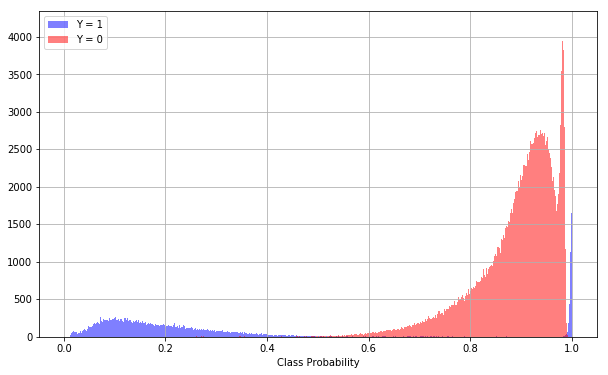

In [84]:
plt.figure(figsize=(10,6))
prob_classes[prob_classes.Y==1]['Class: Delinquent'].hist(alpha=0.5,color='blue',
                                                            bins=1000,label='Y = 1')
prob_classes[prob_classes.Y==0]['Class: No Delinquency'].hist(alpha=0.5,color='red',
                                                                bins=1000,label='Y = 0')
plt.legend()
plt.xlabel('Class Probability');